In [49]:
%pylab inline
import lmfit
from lmfit import Model

Populating the interactive namespace from numpy and matplotlib


In [70]:
def gaussian(x, s2=0.2, mu=0):
    f = 1/(np.sqrt(2*s2*pi))*exp(-(x-mu)**2/(2*s2))
    return f
    

In [71]:
x = linspace(-5, 5, 100)

In [72]:
f = gaussian(x)

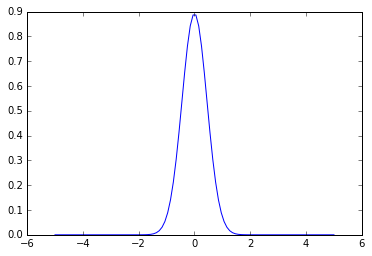

In [73]:
plot(x,f)

In [74]:
mod = lmfit.Model(gaussian, prefix='f1')

[[Variables]]
    N:     10         (init= 10)
    tau:   8          (init= 8)
[[Correlations]] (unreported correlations are <  0.100)


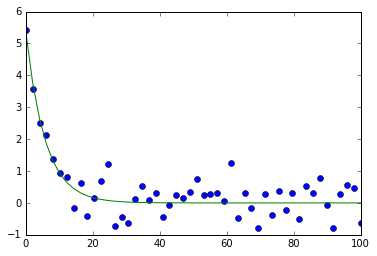

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters, Parameter, report_fit

# generate some data with noise
# replace xData and yData with your data
xData = np.linspace(0., 100., 50.)
Nf = 5.
tauf = 6.5
yData = Nf * np.exp(-xData / tauf) + np.random.normal(0, 0.5, len(xData))
# plt.plot(xData, yData, 'bo')
# plt.show()

def decay(params, x, data):

    N = params['N'].value
    tau = params['tau'].value

    model = N * np.exp(-x/tau)
    return model - data # that's what you want to minimize

# create a set of Parameters
params = Parameters()
params.add('N', value=10) # value is the initial value
params.add('tau', value=8.)

# do fit, here with leastsq model
result = minimize(decay, params, args=(xData, yData))

# calculate final result
final = yData + result.residual

# write error report
report_fit(params)

# plot the data
plt.plot(xData, yData, 'bo')
plt.plot(xData, final, 'g')
plt.show()

print result

In [80]:
from lmfit import minimize, Parameters, Parameter, report_fit
import numpy as np

xdata = np.array([177.,180.,183.,187.,189.,190.,196.,197.,201.,202.,203.,204.,206.,218.,225.,231.,234.,
      252.,262.,266.,267.,268.,277.,286.,303.])

ydata = np.array([0.81,0.74,0.78,0.75,0.77,0.81,0.73,0.76,0.71,0.74,0.81,0.71,0.74,0.71,
      0.72,0.69,0.75,0.59,0.61,0.63,0.64,0.63,0.35,0.27,0.26])

def fit_fc(params, x, data):

    n1 = params['n1'].value
    n2 = params['n2'].value
    n3 = params['n3'].value
    n4 = params['n4'].value
    n5 = params['n5'].value

    model = n1 + (n2 * x + n3) * 1./ (1. + np.exp(n4 * (n5 - x)))

    return model - data #that's what you want to minimize

# create a set of Parameters
# 'value' is the initial condition
# 'min' and 'max' define your boundaries
params = Parameters()
params.add('n1', value= 0.2, min=0.2, max=0.8)
params.add('n2', value= -0.005, min=-0.3, max=10**(-10))
params.add('n3', value= 1.0766, min=-1000., max=1000.)
params.add('n4', value= -0.36379, min=-1000., max=1000.)
params.add('n5', value= 274.0, min=0., max=1000.)

# do fit, here with leastsq model
result = minimize(fit_fc, params, args=(xdata, ydata))

# write error report
report_fit(params)

xplot = np.linspace(min(xdata), max(xdata), 1000)
yplot = result.values['n1'] + (result.values['n2'] * xplot + result.values['n3']) * \
                              1./ (1. + np.exp(result.values['n4'] * (result.values['n5'] - xplot)))
#plot results
try:
    import pylab
    pylab.plot(xdata, ydata, 'k+')
    pylab.plot(xplot, yplot, 'r')
    pylab.show()
except:
    pass

[[Variables]]
    n1:   0.20000000 (init= 0.2)
    n2:  -0.00500000 (init=-0.005)
    n3:   1.07660000 (init= 1.0766)
    n4:  -0.36379000 (init=-0.36379)
    n5:   274        (init= 274)
[[Correlations]] (unreported correlations are <  0.100)


AttributeError: 'MinimizerResult' object has no attribute 'values'